In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv(r'/Users/mac/Documents/python_projects/customer_data.csv')

In [5]:
#Return number of rows and columns
df.shape

(10000, 19)

In [6]:
#Return first 5 rows of the dataset
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [7]:
#Return info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [8]:
#Display number missing values per column
df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [9]:
#Check the mean credit score for each income group
df.groupby(by = 'income')['credit_score'].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [12]:
#Create a function to input missing values based on mean credit score for each income group

def input_creditscore(income_classes):
    """ This function takes a list of income groups and inputs the missing values of each based on mean credit score for each group"""
    #iterate through each income group
    for income_class in income_classes:

        #create a subset of dataframe to use as filter
        mask = df['income'] == income_class
        
        #calculate the mean for the income group
        mean = df[df['income'] == income_class]['credit_score'].mean()

        #fill the missing values with mean of credit score for group
        df.loc[mask,'credit_score'] = df.loc[mask,'credit_score'].fillna(mean)     



In [14]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
input_creditscore(income_groups)

#check for missing values
df.isnull().sum()


id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [15]:
#Check the mean annual mileage for the different driving experience groups
df.groupby(by = 'driving_experience')['annual_mileage'].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [18]:
""" Unlike the “credit_score” column, the mean for the different groups in the “driving_experience” do not vary too widely so we can simply impute the null values using the column mean.

"""

#Calculate mean for annual_mileage column
mean_mileage = df['annual_mileage'].mean()

#Fill in null values using the column mean
df['annual_mileage'].fillna(mean_mileage, inplace = True)

#check for missing values
df.isnull().sum()

/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_15597/2715337799.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_mileage'].fillna(mean_mileage, inplace = True)


age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [17]:
#Delete the id and postal_code columns

df.drop(['id','postal_code'], axis=1, inplace=True)

In [19]:
#Analyzing the data
#Univariate Analysis
#Categorial unordered

#Check the count for each category in the "gender" column
df['gender'].value_counts()


gender
female    5010
male      4990
Name: count, dtype: int64

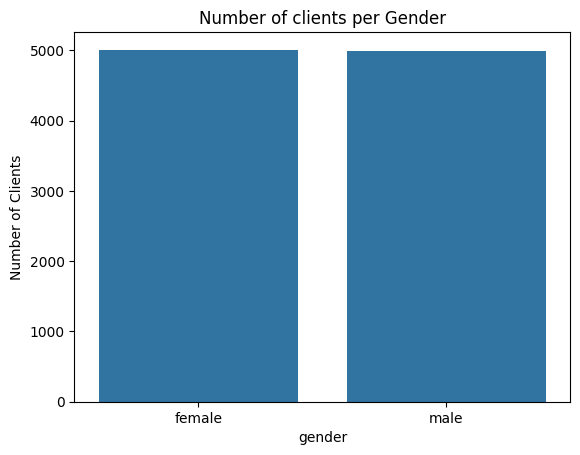

In [21]:
#Create a countplot to visualize the count of each category in the gender column.

sns.countplot(data=df, x='gender')
plt.title('Number of clients per Gender')
plt.ylabel('Number of Clients')
plt.show()



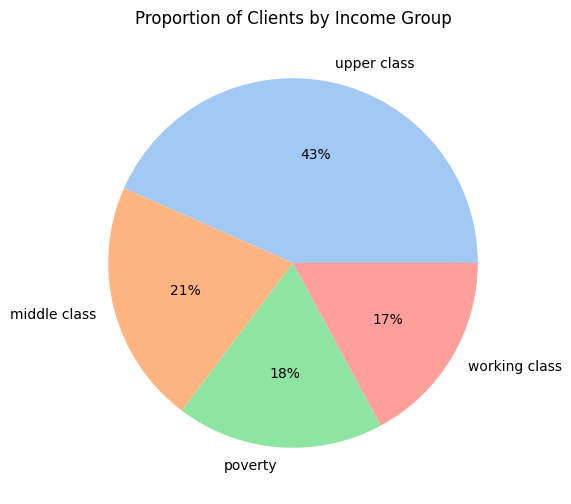

In [23]:
#Categorial ordered

#Define plot size
plt.figure(figsize = [6,6])

#Define column to use
data = df['income'].value_counts(normalize=True)

#Define labels
labels = ['upper class','middle class','poverty','working class']

#Define color palette
colors = sns.color_palette('pastel')

#Create a pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Proportion of Clients by Income Group')
plt.show()

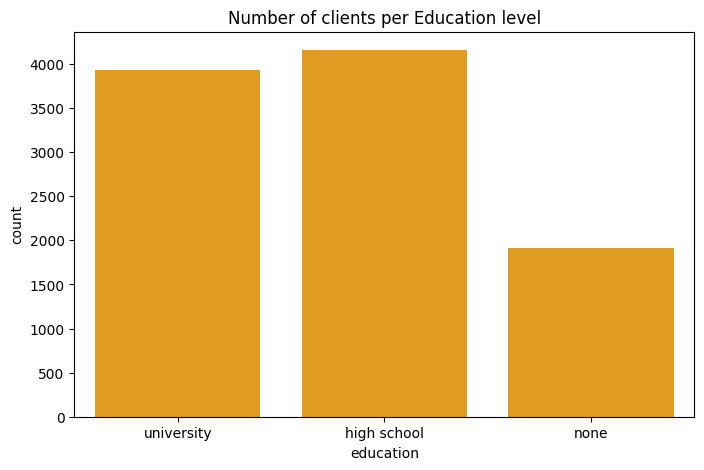

In [28]:
#Create a countplot to visualize the count of each category in the education column 
plt.figure(figsize=[8,5])
sns.countplot(data=df, x='education', order=['university','high school','none'], color='orange')
plt.title('Number of clients per Education level')
plt.show()

In [29]:
#Return summary statistics for the "credit_score" column
df['credit_score'].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

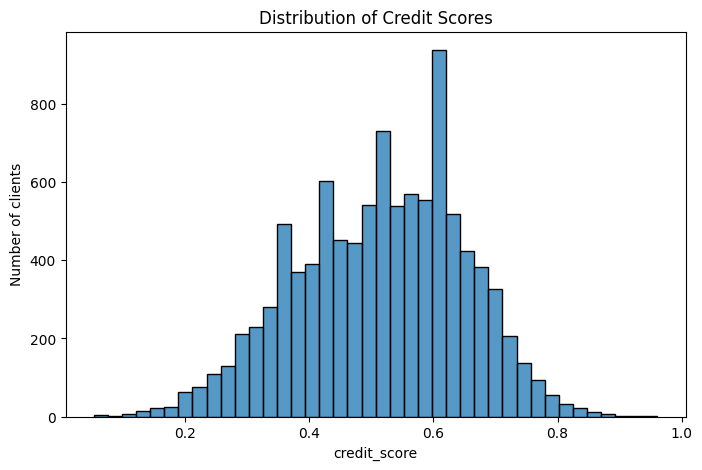

In [34]:
#Plot a histogram using the "credit_score" column
plt.figure(figsize=[8,5])
sns.histplot(data=df, x="credit_score", bins=40).set(title="Distribution of Credit Scores",ylabel="Number of clients")
plt.show()

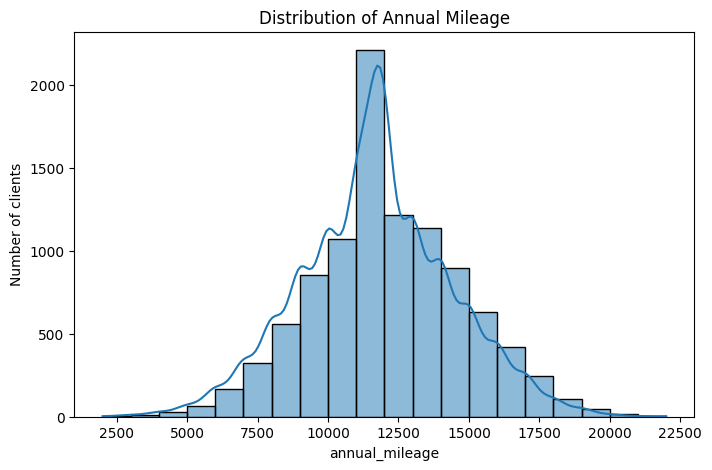

In [37]:
#Plot a histogram using the "annual_mileage" column
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='annual_mileage',bins=20,kde=True).set(title='Distribution of Annual Mileage',ylabel='Number of clients')
plt.show()

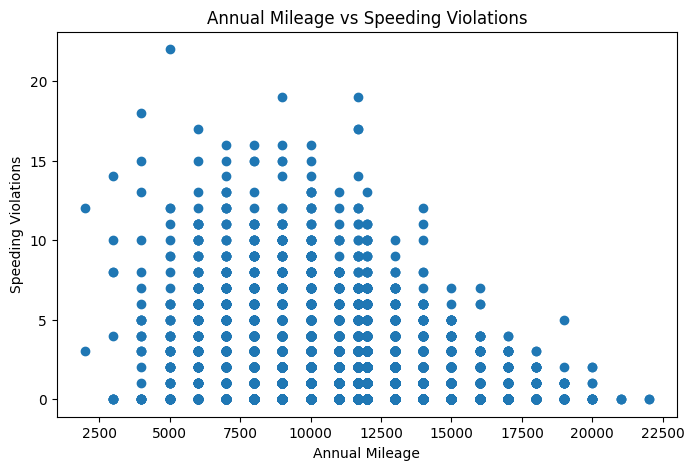

In [38]:
#Bivariate Analysis
#Numeric-Numeric

#Create a scatter plot to. show relationship between "annual_mileage" and "speeding_violations"
plt.figure(figsize=[8,5])
plt.scatter(data=df, x='annual_mileage', y='speeding_violations')
plt.title('Annual Mileage vs Speeding Violations')
plt.ylabel('Speeding Violations')
plt.xlabel('Annual Mileage')
plt.show()

In [39]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = df[['speeding_violations','DUIs','past_accidents']].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


In [40]:
""" All our variables exhibit a positive correlation with each other, meaning when one goes up the other goes up as well and vice-versa. 
But how do we interpret the strength of this relationship? Generally speaking, a correlation coefficient between 0.5 and 0.7 indicates 
variables that can be considered moderately correlated, while a correlation coefficient whose magnitude is between 0.3 and 0.5 
indicates variables that exhibit weak correlation, as is the case with most of our variables. 
This means a moderate, positive correlation exists between the number of past accidents and speeding violations, 
while a weak, positive correlation exists between the number of past accidents and DUIs."""

' All our variables exhibit a positive correlation with each other, meaning when one goes up the other goes up as well and vice-versa. \nBut how do we interpret the strength of this relationship? Generally speaking, a correlation coefficient between 0.5 and 0.7 indicates \nvariables that can be considered moderately correlated, while a correlation coefficient whose magnitude is between 0.3 and 0.5 \nindicates variables that exhibit weak correlation, as is the case with most of our variables. \nThis means a moderate, positive correlation exists between the number of past accidents and speeding violations, \nwhile a weak, positive correlation exists between the number of past accidents and DUIs.'

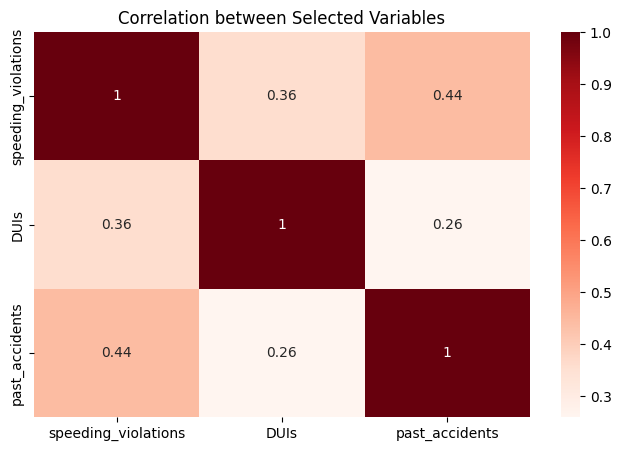

In [42]:
#Create a heatmap to visualize correlation
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation between Selected Variables')
plt.show()

In [43]:
#Numeical-Categorial

#Check the mean annual mileage per category in the outcome column
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_15597/1223075882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='outcome', y='annual_mileage',palette=['royalblue', 'darkorange'])


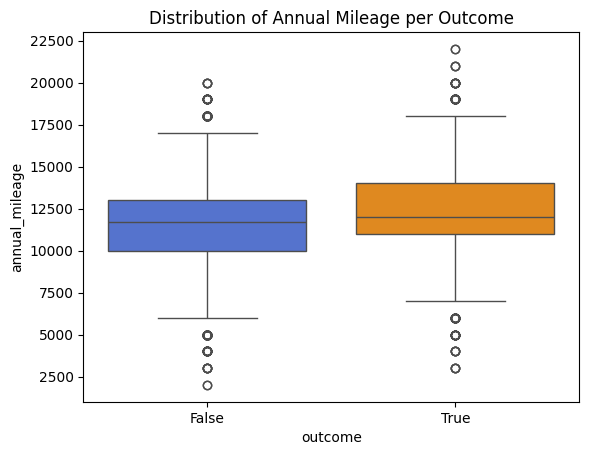

In [46]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='outcome', y='annual_mileage',palette=['royalblue', 'darkorange'])
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

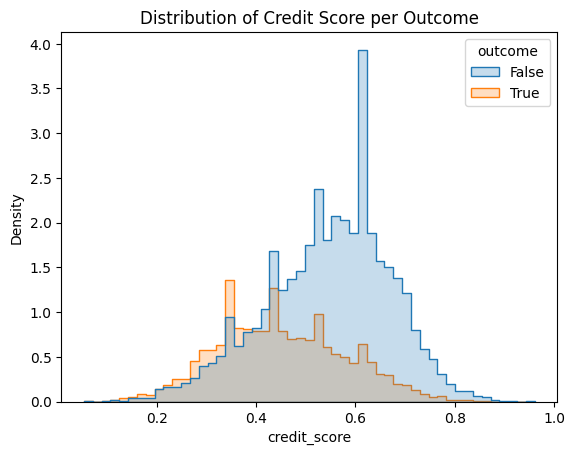

In [47]:
#Create histograms to compare distribution 
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

In [48]:
#Create a new "claim rate" column
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

claim_rate
0    6867
1    3133
Name: count, dtype: int64

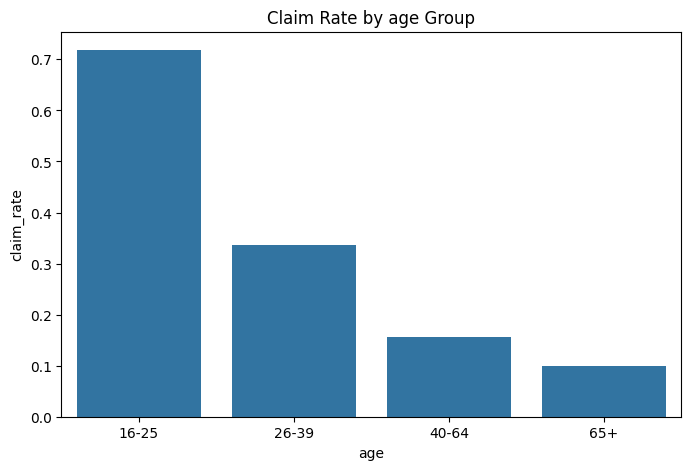

In [50]:
#Plot the average claim rate per age group
plt.figure(figsize=[8,5])
df2 = df.groupby(by='age')['claim_rate'].mean()
sns.barplot(data=df2)
plt.title('Claim Rate by age Group')
plt.show()

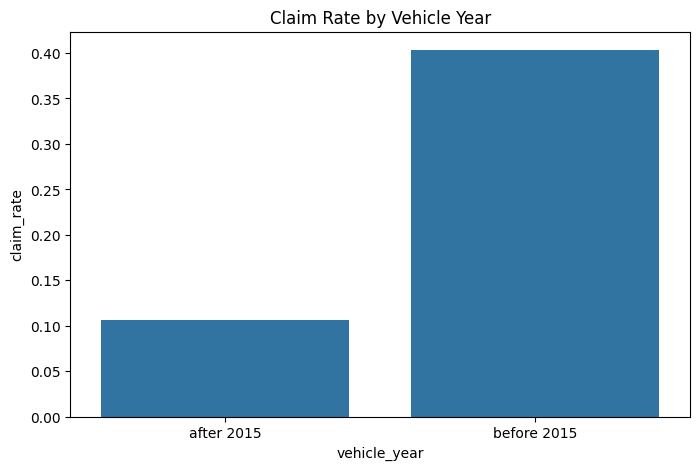

In [51]:
#Plot the average claim rate per vehicle year category
plt.figure(figsize=[8,5])
df3 = df.groupby(by='vehicle_year')['claim_rate'].mean()
sns.barplot(data=df3)
plt.title('Claim Rate by Vehicle Year')
plt.show()

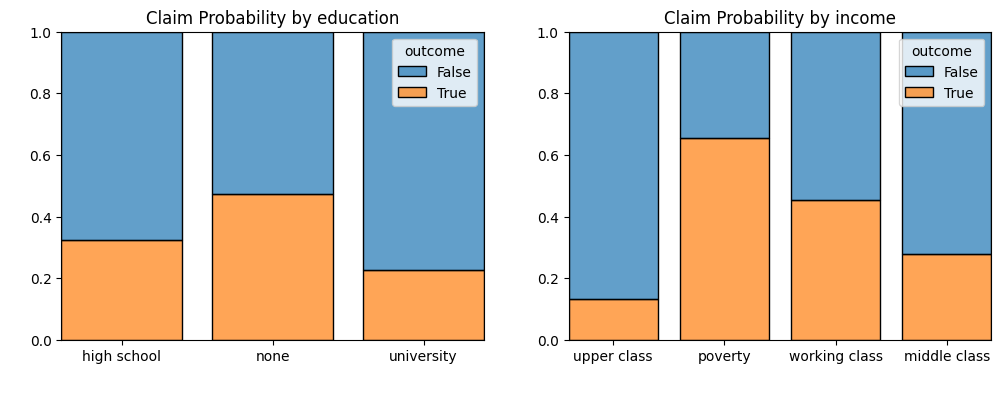

In [52]:
#Create an empty figure object
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Plot two probability graphs for education and income
for i,col in enumerate(["education","income"]):
    sns.histplot(df, ax=axes[i],x=col, hue="outcome",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ") 

In [56]:
""" Clients with no education are more likely to file a claim compared to high school and university graduates, while clients in the “poverty” income group are more likely to file a claim, followed by clients in the “working class” and 
“middle class” categories, in that order."""


' Clients with no education are more likely to file a claim compared to high school and university graduates, while clients in the “poverty” income group are more likely to file a claim, followed by clients in the “working class” and \n“middle class” categories, in that order.'

In [57]:
#Multivariate analysis
#Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=df,index='education',columns='income',values='claim_rate',aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


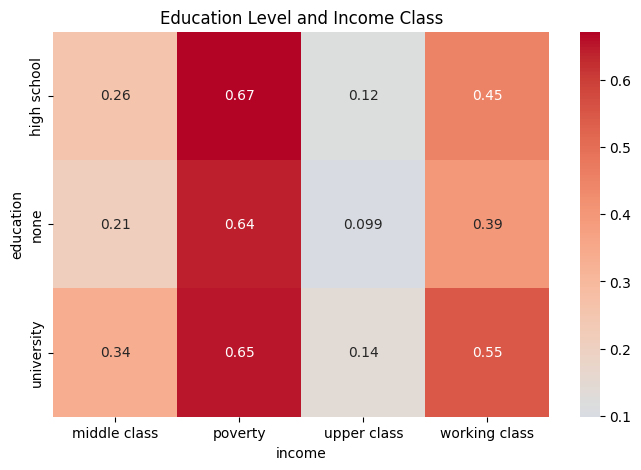

In [58]:
#Create a heatmap to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm',center=0.117)
plt.title("Education Level and Income Class")
plt.show()

In [61]:
""" High school graduates in the poverty income class have the highest claim rate, followed by university graduates in the poverty income class.Clients in the upper class income category with no education have the lowest claim rates."""

' High school graduates in the poverty income class have the highest claim rate, followed by university graduates in the poverty income class.Clients in the upper class income category with no education have the lowest claim rates.'

In [63]:
#Create pivot table for driving experience and marital status with average claim rate as values
drivexp_married = pd.pivot_table(data=df, index='driving_experience', columns='married', values='claim_rate' )
drivexp_married

married,False,True
driving_experience,,
0-9y,0.697981,0.500799
10-19y,0.307018,0.164884
20-29y,0.068742,0.041543
30y+,0.046332,0.010088


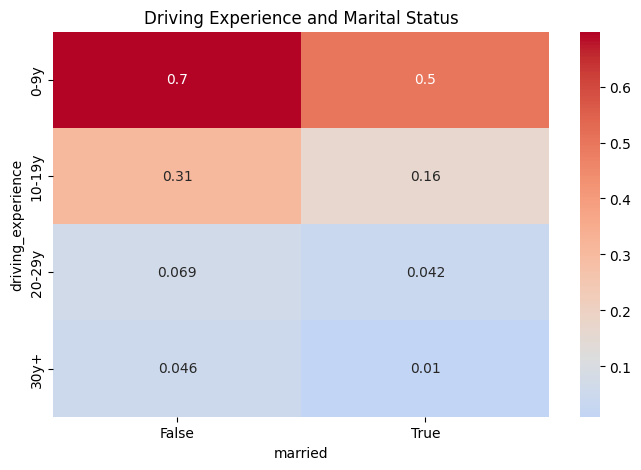

In [64]:
#Create a heatmap to visualize driving experience, marrital status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(drivexp_married,annot=True,cmap='coolwarm',center=0.117)
plt.title("Driving Experience and Marital Status")
plt.show()

In [68]:
""" Unmarried individuals with 0–9 years of driving experience are the most likely to file a claim, while married individuals with 30+ years of driving experience are the least likely to file a claim."""

' Unmarried individuals with 0–9 years of driving experience are the most likely to file a claim, while married individuals with 30+ years of driving experience are the least likely to file a claim.'

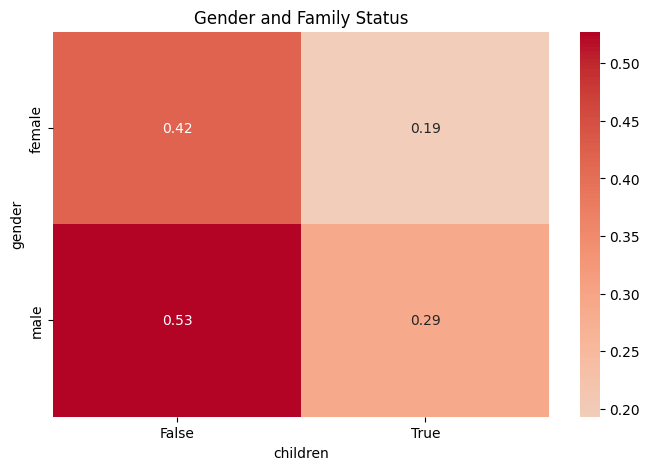

In [69]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Gender and Family Status")
plt.show()

In [70]:
"""Men without children are the most likely to make a claim while women with children are the least likely to make a claim."""

'Men without children are the most likely to make a claim while women with children are the least likely to make a claim.'